In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
def plot(index):
    plt.figure(figsize=(10, 2)) 
    plt.imshow(x_train[index])

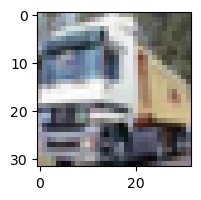

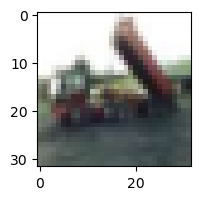

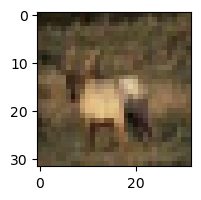

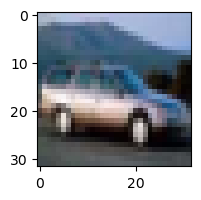

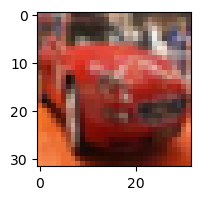

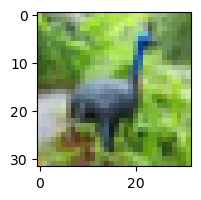

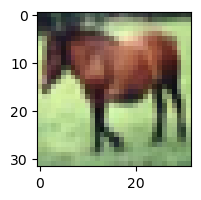

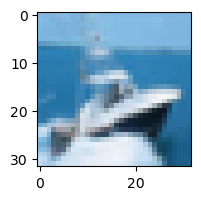

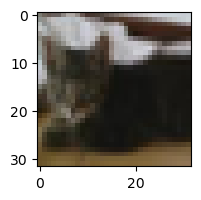

In [9]:
for i in range(1,10):
    plot(i)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [13]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [16]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

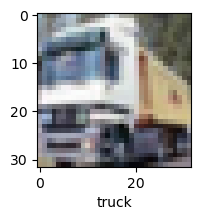

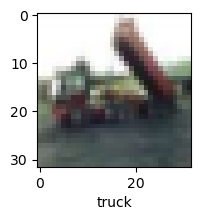

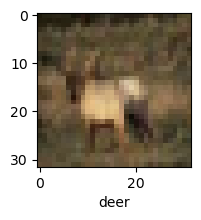

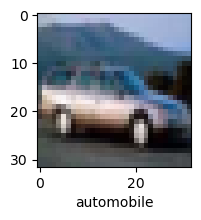

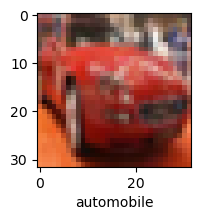

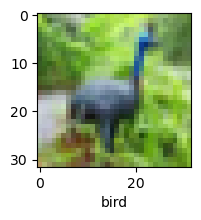

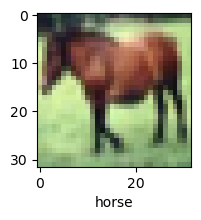

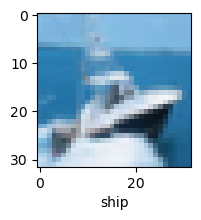

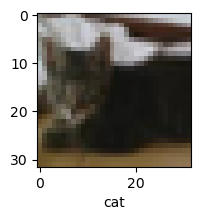

In [17]:
for i in range(1,10):
    plot_sample(x_train, y_train, i)

In [18]:
x_train = x_train / 255
x_test = x_test / 255

In [19]:
from tensorflow.keras import layers, models
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)



Epoch 1/5


1563/1563 [==============================] - 57s 35ms/step - loss: 1.8085 - accuracy: 0.3567
Epoch 2/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6187 - accuracy: 0.4288
Epoch 3/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5377 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.4775 - accuracy: 0.4799
Epoch 5/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4296 - accuracy: 0.4964


In [21]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 5s 13ms/step - loss: 1.4557 - accuracy: 0.4834


[1.4557255506515503, 0.48339998722076416]

In [22]:
from sklearn.metrics import confusion_matrix , classification_report

In [25]:
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 13ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.65      0.56      1000
           1       0.54      0.66      0.60      1000
           2       0.41      0.27      0.33      1000
           3       0.33      0.49      0.39      1000
           4       0.38      0.50      0.43      1000
           5       0.51      0.25      0.34      1000
           6       0.66      0.33      0.44      1000
           7       0.61      0.49      0.54      1000
           8       0.63      0.59      0.61      1000
           9       0.49      0.59      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [26]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 29s 17ms/step - loss: 1.4426 - accuracy: 0.4868
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0914 - accuracy: 0.6181
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9647 - accuracy: 0.6660
Epoch 4/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8721 - accuracy: 0.6980
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8053 - accuracy: 0.7214
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7388 - accuracy: 0.7423
Epoch 7/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.6804 - accuracy: 0.7639
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6330 - accuracy: 0.7786
Epoch 9/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.5842 - accuracy: 0.7961
Epoch 10/10
1563/1563 [==============================] - 29s 19

In [27]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9653 - accuracy: 0.7021


[0.9652619361877441, 0.7020999789237976]

In [38]:
y_pred1 = cnn.predict(x_test)
y_pred_classes1 = [np.argmax(element) for element in y_pred1]
print("Classification Report: \n", classification_report(y_test, y_pred_classes1))

313/313 [==============================] - 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.80      0.74      1000
           1       0.85      0.79      0.82      1000
           2       0.57      0.64      0.60      1000
           3       0.53      0.51      0.52      1000
           4       0.63      0.68      0.65      1000
           5       0.63      0.57      0.60      1000
           6       0.85      0.67      0.75      1000
           7       0.72      0.77      0.75      1000
           8       0.83      0.79      0.81      1000
           9       0.77      0.79      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [40]:
cnn.predict(x_test)

313/313 [==============================] - 3s 9ms/step


array([[1.6227026e-03, 9.4514899e-06, 4.8516458e-03, ..., 6.2067108e-04,
        1.7221381e-03, 6.9099886e-05],
       [5.5743340e-06, 2.7727814e-05, 6.6917869e-07, ..., 2.0624422e-10,
        9.9996555e-01, 4.2778569e-07],
       [7.7797323e-02, 9.5071159e-02, 2.2299167e-02, ..., 9.7000627e-03,
        7.8758854e-01, 4.5035384e-03],
       ...,
       [5.6645284e-08, 3.8577647e-07, 6.5627210e-03, ..., 4.4939335e-02,
        5.4266120e-06, 1.7355134e-08],
       [2.0700017e-02, 4.8428136e-03, 4.2737392e-03, ..., 3.8738079e-02,
        5.6352921e-05, 1.3810220e-03],
       [2.1424325e-09, 1.8146835e-09, 6.8137689e-07, ..., 9.9690229e-01,
        1.5368063e-09, 3.4048284e-10]], dtype=float32)

In [41]:
y_pred_classes1 = [np.argmax(element) for element in y_pred1]
y_pred_classes1

[3,
 8,
 8,
 0,
 4,
 6,
 1,
 6,
 3,
 9,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 4,
 2,
 4,
 0,
 9,
 6,
 6,
 2,
 4,
 3,
 9,
 1,
 7,
 0,
 9,
 5,
 4,
 6,
 7,
 6,
 0,
 9,
 3,
 7,
 7,
 2,
 7,
 8,
 2,
 6,
 8,
 8,
 7,
 3,
 5,
 2,
 7,
 5,
 6,
 3,
 6,
 2,
 1,
 2,
 3,
 9,
 2,
 6,
 8,
 8,
 0,
 2,
 0,
 3,
 2,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 0,
 2,
 9,
 9,
 0,
 4,
 8,
 6,
 4,
 6,
 6,
 0,
 2,
 2,
 4,
 5,
 6,
 3,
 1,
 1,
 8,
 6,
 8,
 7,
 5,
 1,
 2,
 2,
 0,
 7,
 0,
 4,
 2,
 3,
 8,
 7,
 1,
 2,
 8,
 0,
 8,
 3,
 3,
 0,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 4,
 5,
 6,
 5,
 8,
 3,
 6,
 5,
 7,
 3,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 3,
 4,
 0,
 1,
 3,
 2,
 0,
 7,
 8,
 4,
 9,
 0,
 9,
 0,
 0,
 8,
 9,
 9,
 6,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 0,
 8,
 2,
 3,
 3,
 8,
 5,
 8,
 7,
 1,
 7,
 4,
 8,
 8,
 5,
 8,
 5,
 0,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 3,
 0,
 5,
 9,
 8,
 0,
 1,
 9,
 0,
 7,
 7,
 3,
 9,
 5,
 9,
 9,
 9,
 2,
 3,
 3,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 3,
 2,
 1,
 1,
 0,
 9,
 0,
 8,
 0,
 8,
 2,
 0,


In [44]:
def predict(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

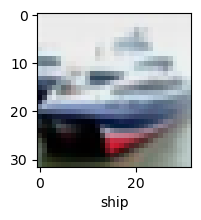

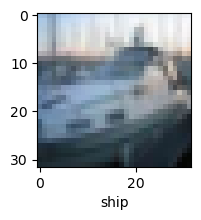

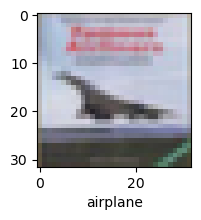

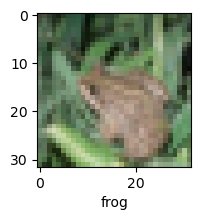

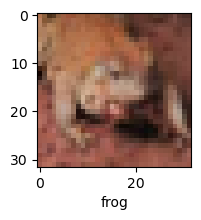

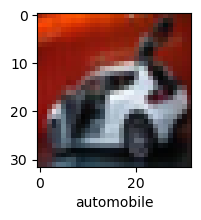

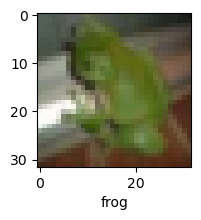

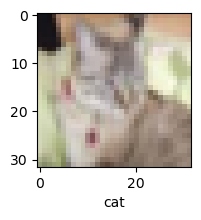

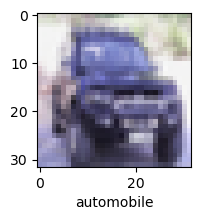

In [45]:
for i in range(1,10):
    predict(x_test, y_test, i)